<a href="https://colab.research.google.com/github/Yamada8412/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opencvでテンプレートマッチングを実装して、Amazonの商品画面から、その商品が現在在庫切れかを判断するプログラムを作成する。

今回使う画像をまとめたwork3フォルダーをcolaboratory上にダウンロードする

In [22]:
!wget "https://drive.google.com/uc?export=download&id=1zYAsg_IKzzXPEkopssX8pZGv6pKo-DYn" -O work3.zip
!unzip -o work3.zip

--2023-01-20 17:22:49--  https://drive.google.com/uc?export=download&id=1zYAsg_IKzzXPEkopssX8pZGv6pKo-DYn
Resolving drive.google.com (drive.google.com)... 74.125.126.100, 74.125.126.138, 74.125.126.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.126.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utneosilcscb64nbf3svoe7qqrgjjnvq/1674235350000/10628003983001058115/*/1zYAsg_IKzzXPEkopssX8pZGv6pKo-DYn?e=download&uuid=db0bda17-32fd-47dc-91f8-5f220fd58ca0 [following]
--2023-01-20 17:22:50--  https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utneosilcscb64nbf3svoe7qqrgjjnvq/1674235350000/10628003983001058115/*/1zYAsg_IKzzXPEkopssX8pZGv6pKo-DYn?e=download&uuid=db0bda17-32fd-47dc-91f8-5f220fd58ca0
Resolving doc-0s-68-docs.googleusercontent.com (doc-0s-68-docs.googleusercontent.com)... 142.250.128.132, 2607

+ 必要なライブラリをインポートする

In [20]:
import cv2
import sys
import glob
from google.colab.patches import cv2_imshow

+ Amazonの商品画面(img)から「現在在庫切れです。」と書かれてある部分を切り取り、templateに格納。

カラー画像を白黒画像で読み込んでいるのは、色付きだと、処理しなければいけない値が多すぎて

<font color = 'red'>ValueError</font>: too many values to unpack (expected 2)

となってしまうから

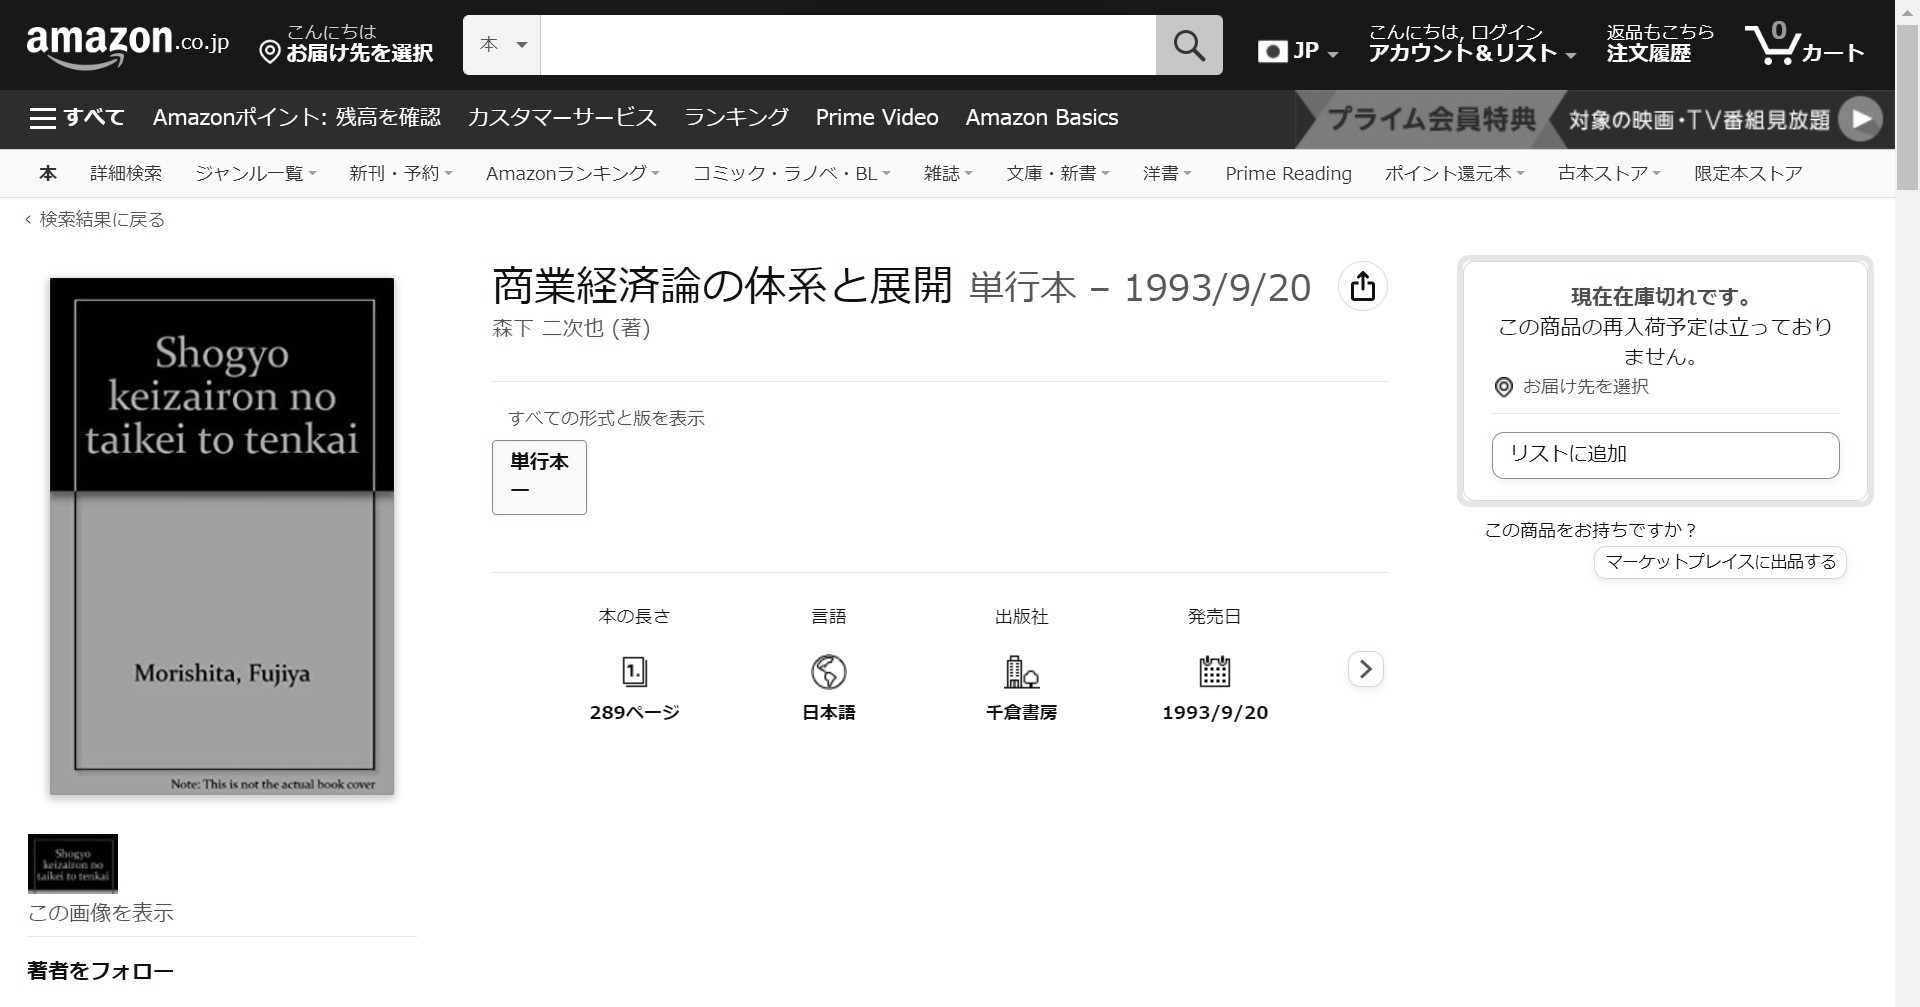

img の中身----------------------------------------


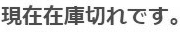

template の中身----------------------------------------


In [29]:
img = cv2.imread('work3/amazon.jpg',0) #白黒で読み込む
if img is None:
   sys.exit(f'エラー: ファイルを開けませんでした')
cv2_imshow(img)
print('img の中身----------------------------------------')

template= img[281:313,1570:1750] #「現在在庫切れです。」と書かれている部分は自分で位置を調べて切り取る。
cv2_imshow(template)
print('template の中身----------------------------------------')

+ imgの中に、templateが含まれているかを探索し、正しくプログラムが動くかを確認する。

下のurlで、cv2.matchTemplateの使い方と、今回使うmethodの紹介してくれている。



https://pystyle.info/opencv-template-matching/



1 : cv2.TM_CCOEFF


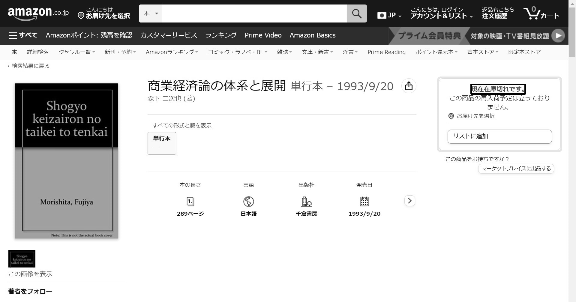

2 : cv2.TM_CCOEFF_NORMED


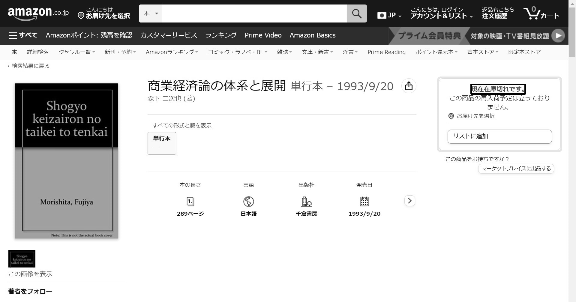

3 : cv2.TM_CCORR


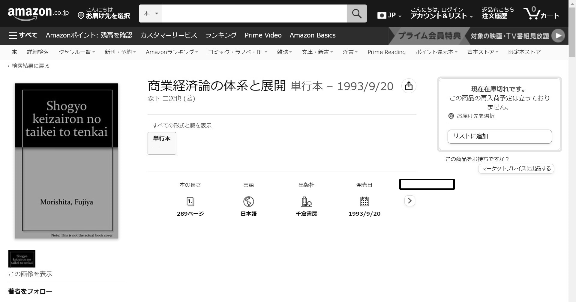

4 : cv2.TM_CCORR_NORMED


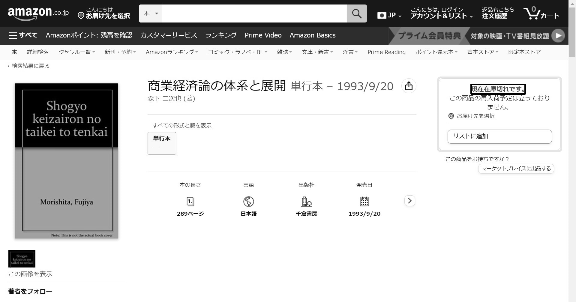

5 : cv2.TM_SQDIFF


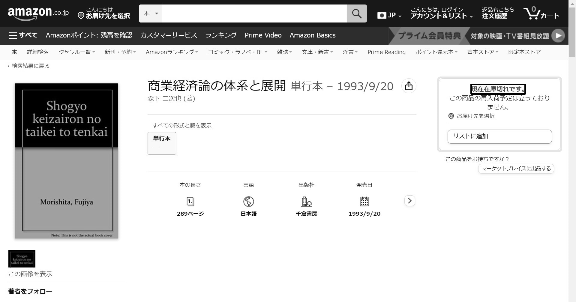

6 : cv2.TM_SQDIFF_NORMED


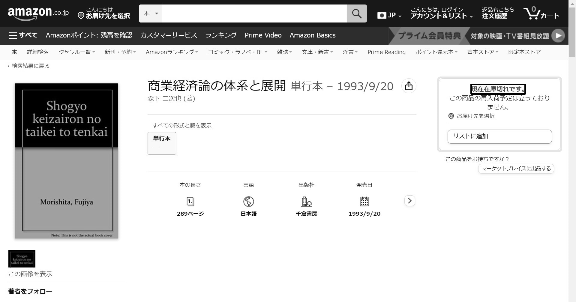

In [32]:
h = template.shape[0]
w = template.shape[1]

algos = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED',
           'cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for i,algo in enumerate(algos,1):
  img_copy2 = img.copy()
  algorisum = eval(algo)#methを、strからint型に直すためevalを使う.

#探索対象画面に対して、テンプレート画像と同じ大きさの検索窓を左上から右へ走査し、各点における類似度を出力する。
  rui = cv2.matchTemplate(img_copy2,template,algorisum)
  min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(rui)#左から（最小の値、最大の値、最小の値がある座標、最大の値がある座標）

  if algorisum in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:#cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMEDアルゴリズムの場合は、最小値(min_val)が小さいほど類似度が高いことになる。
    x1y1 = min_loc
  else:#'cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED'の場合は、最大値(max_val)が高い方が類似度が高いことになる。
    x1y1 = max_loc
  x2y2 = (x1y1[0] + w,x1y1[1] + h)

  cv2.rectangle(img_copy2,x1y1,x2y2,(0,0,255),3)#座標と色と線の太さを入力して、長方形を描く。

  img_copy2 = cv2.resize(img_copy2, dsize=None, fx=0.3, fy=0.3)#結果の画像を表示するため、探索結果画像の大きさを0.3倍にする
  print(f'{i} : {algo}')
  cv2_imshow(img_copy2)

上から3番目のcv2.TM_CCORRアルゴリズムを使った探索結果画像を見てみると、**正しく囲えていない**ことが分かり、それと同時に、たとえ「現在在庫切れです。」という表示を捉えることができなくても、**他の適当な空間を無理やり囲んでしまう**ことが分かった。

***

これだけでは、テンプレートマッチングだけで在庫があるかどうかを判断できないので今度はimg2から「在庫あり。」の部分を切り取り、それが探索対象画面内にあるかを調べるプログラムを作成する。

+ 別のAmazonの商品画面(img2)から「在庫あり。」と書かれてある部分を切り取り、template2に格納。


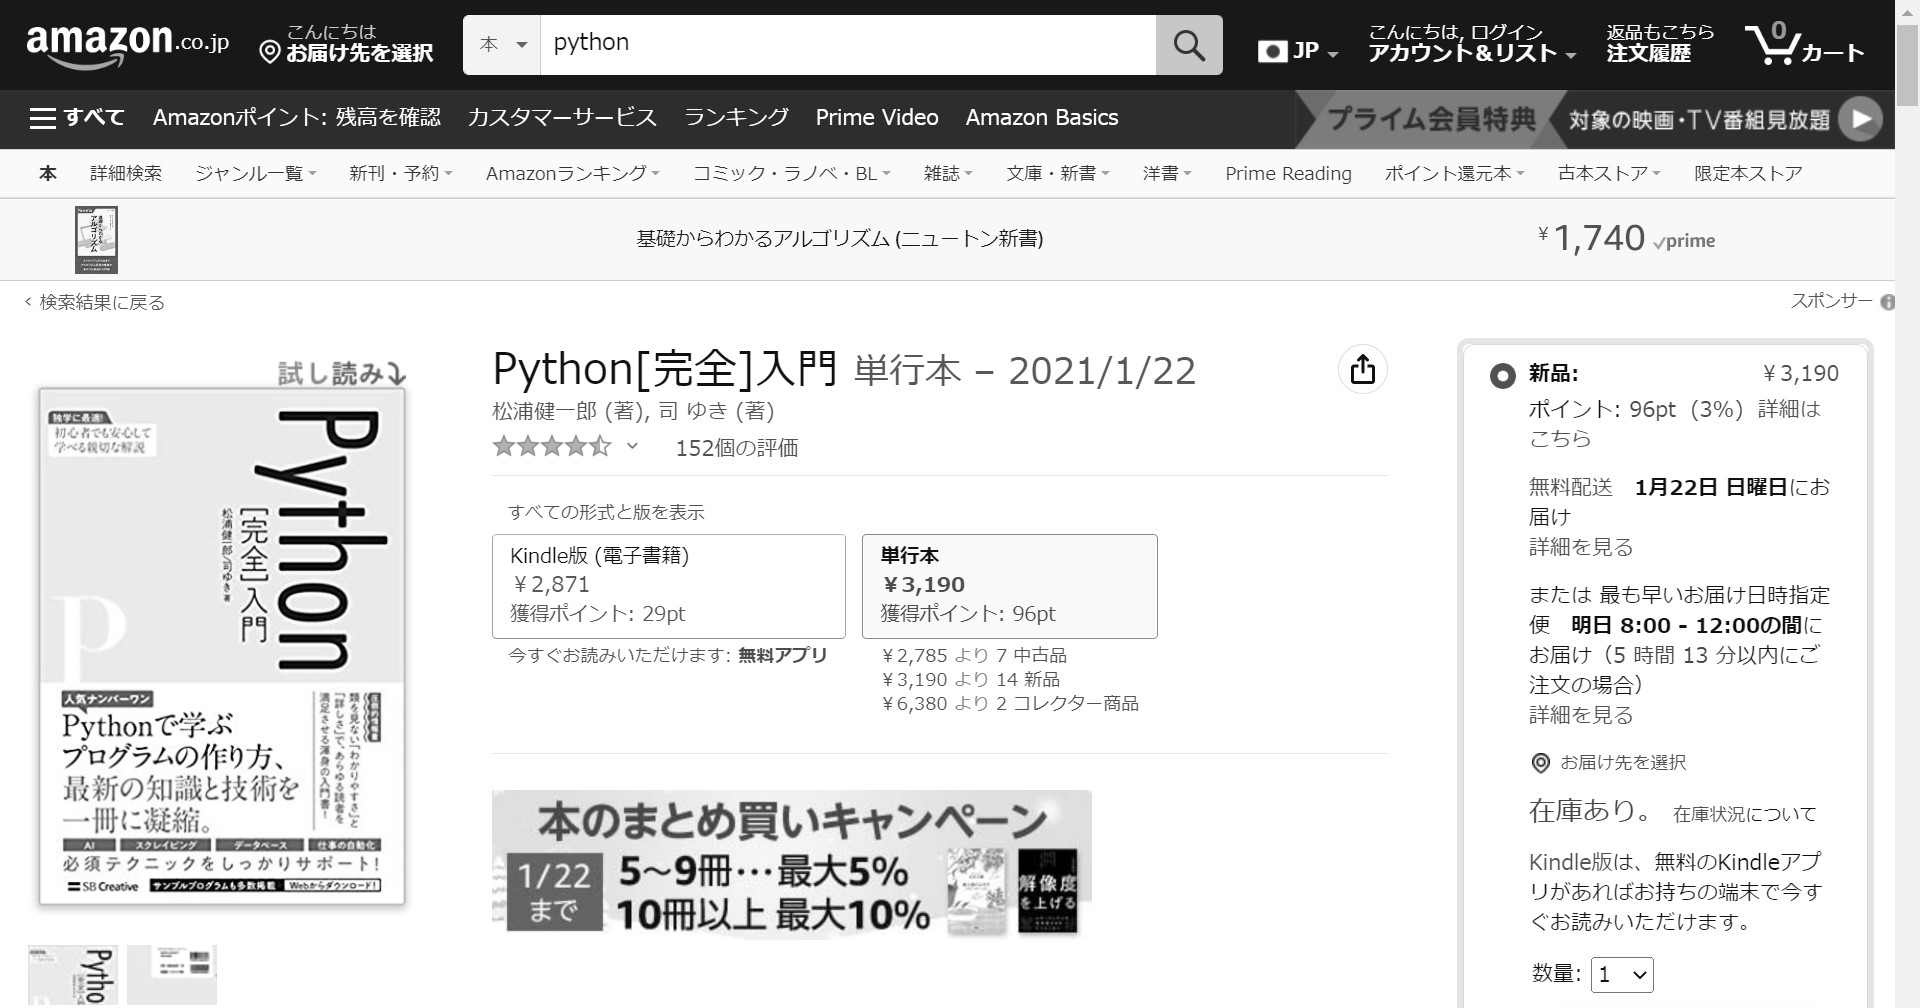

img2 の中身----------------------------------------


template2 の中身--------------------------------------


In [30]:
img2 = cv2.imread('work3/amazon2.jpg',0)
if img2 is None:
  sys.exit(f'エラー: ファイルを開けませんでした')
cv2_imshow(img2)
print('img2 の中身----------------------------------------')

template2 = img2[795:825,1525:1650] #在庫あり。」の部分を、自分で位置を調べて切り抜く。
cv2_imshow(template2)
print('template2 の中身--------------------------------------')

+ img2の中に、template2が含まれているかを探索し、しっかりとプログラムが動くかを確認する。

変数が違うだけで、プログラムの内容は上と同じ。

1 : cv2.TM_CCOEFF


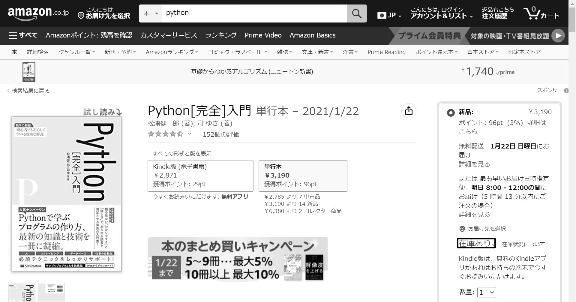

2 : cv2.TM_CCOEFF_NORMED


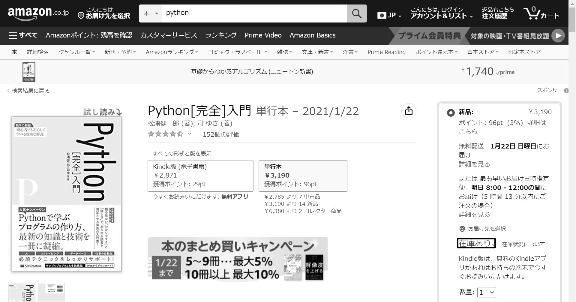

3 : cv2.TM_CCORR


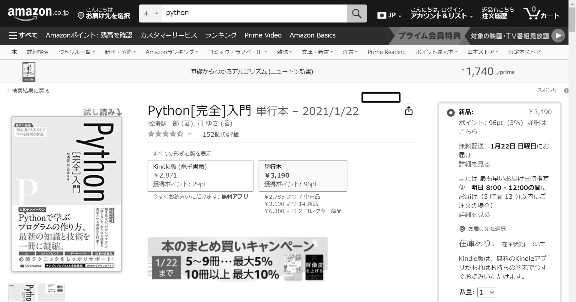

4 : cv2.TM_CCORR_NORMED


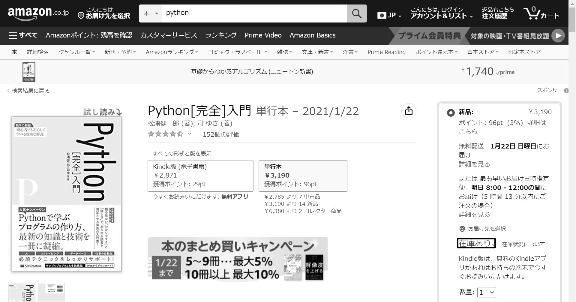

5 : cv2.TM_SQDIFF


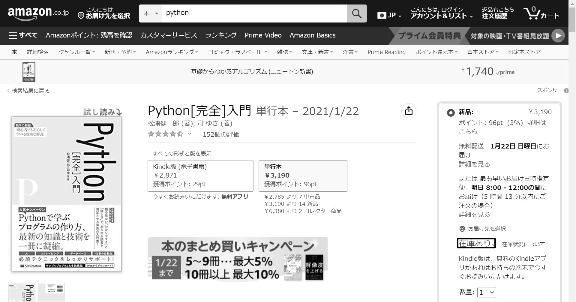

6 : cv2.TM_SQDIFF_NORMED


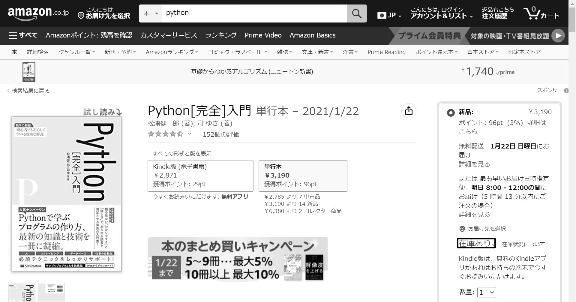

In [31]:
h = template2.shape[0]
w = template2.shape[1]

algos = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED',
           'cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for i,algo in enumerate(algos,1):
  img_copy3 = img2.copy()
  algorisum = eval(algo)

  rui = cv2.matchTemplate(img_copy3,template2,algorisum)
  min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(rui)

  if algorisum in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
    x1y1 = min_loc
  else:
    x1y1 = max_loc
  x2y2 = (x1y1[0] + w,x1y1[1] + h)

  cv2.rectangle(img_copy3,x1y1,x2y2,(0,0,255),3)

  img_copy3 = cv2.resize(img_copy3, dsize=None, fx=0.3, fy=0.3)
  print(f'{i} : {algo}')
  cv2_imshow(img_copy3)

2つとも外したcv2.TM_CCORRアルゴリズム(たぶんこのアルゴリズムの使い方は間違ってない)は放っておいて、それ以外のアルゴリズムを使用した**プログラムに間違いがないことが確認できたので、**

# 与えられたAmazonの商品画面から、その商品が在庫切れか、在庫ありかを判断するプログラムを最後に作る

## 関数の定義
###上の動作確認で作成したプログラムとほとんど同じ

+ 関数zaiko_nashiの引数は、テスト画像と上で作成したtemplate(「現在在庫切れです。」の方）
+ 返り値は、max_min_list(6個のアルゴリズムそれぞれで類似度が最大になったときの値)
***

+ 関数zaiko_ariの引数は、テスト画像と上で作成したtemplate2(「在庫あり。」の方)
+ 返り値は、max_min_list(6個のアルゴリズムそれぞれで類似度が最大になったときの値)

In [41]:
from typing_extensions import runtime
def zaiko_nashi(img,template):
  max_min_list = []#それぞれのアルゴリズムで類似度が最大の値を格納する

  algos = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED',
             'cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

  for algo in algos:
    img_copy2 = img.copy()
    algorisum = eval(algo)

    rui = cv2.matchTemplate(img_copy2,template,algorisum)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(rui)

    if algorisum in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:#cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMEDアルゴリズムの場合は、最小値(min_val)が小さいほど類似度が高いことになる。
      max_min_list.append(min_val)
    else:#'cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED'の場合は、最大値(max_val)が高い方が類似度が高いことになる。
      max_min_list.append(max_val)

  return max_min_list

def zaiko_ari(img2,template):#上とほとんど同じ関数

  max_min_list = []

  algos = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED',
             'cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

  for algo in algos:
    img_copy3 = img2.copy()
    algorisum = eval(algo)

    rui = cv2.matchTemplate(img_copy3,template,algorisum)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(rui)

    if algorisum in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
      max_min_list.append(min_val)
    else:
      max_min_list.append(max_val)
      
  return max_min_list

#在庫切れか在庫ありか判断
テスト画像として、work3/test1.jpg、work3/test2.jpg、work3/test3.jpg、work3/test4.jpg、上で利用したwork3/amazon.jpg、work3/amazon2.jpgを用意した。

「現在在庫切れです。」(zaiko_nashi関数)と「在庫あり。」(zaiko_ari関数)で、それぞれ6つのアルゴリズムから出力される類似度が最大になる点の値が格納されたmax_min_listが作られたが、

例えば「現在在庫切れです。」という表記のある画像をテスト画像として使うと、**もちろんzaiko_nashi関数では、そのテスト画像から「現在在庫切れです。」という表記を見つけることができるので、それぞれのアルゴリズムで、類似度を表す値の最大値は大きくなる(cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMEDの場合は最小値が小さくなる)。一方で、zaiko_ari関数では、もちろん「在庫あり。」という表記を見つけることができないので、それぞれのアルゴリズムで類似度を表す値の最大値は小さくなる(cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMEDの場合は最小値が大きくなる)。**
***
それを利用して、zaiko_nashi関数とzaiko_ari関数のそれそれ6個のアルゴリズムの間で、どちらがより類似度の高い値を見つけ出せたか個数を数え、多かった方の結果を出力する。

***
# 結果は一番下に出力されます

テスト画像一覧:['work3/test1.jpg', 'work3/test3.jpg', 'work3/amazon2.jpg', 'work3/test2.jpg', 'work3/amazon.jpg', 'work3/test4.jpg']
テストする画像の名前を入力してください：work3/test1.jpg
work3/test1.jpgを出力します


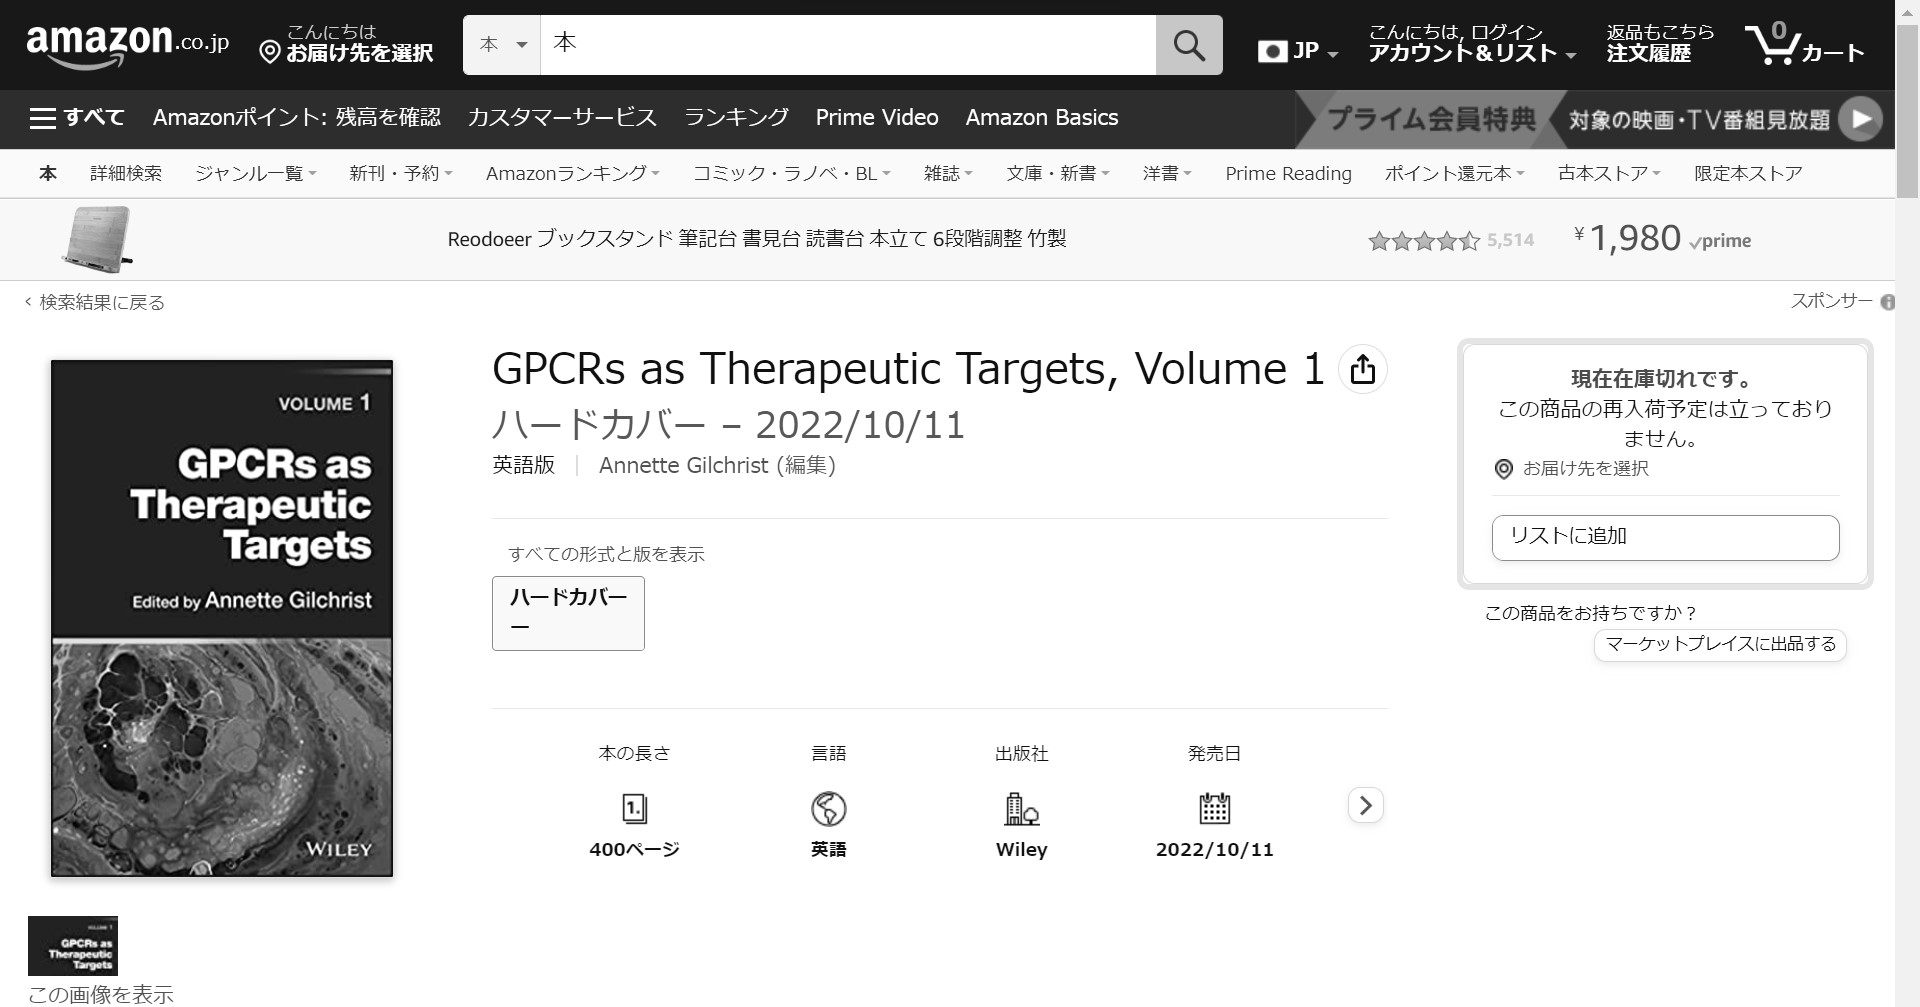

----------
現在在庫切れです


In [46]:
test_image = glob.glob('work3/*.jpg')
print(f'テスト画像一覧:{test_image}')#テスト画像を選んでもらう

while True:
  input_image = input('テストする画像の名前を入力してください：')

  if input_image not in test_image:#存在しないテスト画像の場合はもう一回入力させる
    print('テスト画像一覧内の画像から選んでください')
    continue
  else:
    if input_image is None:
      sys.exit(f'エラー: ファイルを開けませんでした')
    break

img = cv2.imread(input_image,0) #白黒で読み込む
print(f'{input_image}を出力します')
cv2_imshow(img)

Nashi_list = zaiko_nashi(img,template)#templateは上で作成した「現在在切れです。」の切り取り画像
Ari_list = zaiko_ari(img,template2)#template2は上で作成した「在庫あり。」の切り取り画像

Nashi = 0
Ari = 0
for i in range(0,6):

  if Nashi_list[i] == Ari_list[i]:#Nashi_list[i] == Ari_list[i]の時はカウントしない
    pass
    
  else:
    #['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']の順で格納されているため
    ##cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMEDアルゴリズムの場合は、値が小さいほど類似度が高いことになることを考慮すると1～4番目(i <= 3)の値は、大きい方が類似度が高い。
    if i <= 3:
      if Nashi_list[i] > Ari_list[i]:
        Nashi += 1
      else:
        Ari += 1
    else:
      if Nashi_list[i] < Ari_list[i]:
        Nashi += 1
      else:
        Ari += 1

print('----------')
if Nashi == Ari:#Nashi == Ariじゃない場合も判断できない場合はある(そもそも「現在在庫がありません。」や「在庫あり。」の表記がない場合)
  print('判断できません')
elif Nashi > Ari:
  print('現在在庫切れです')
else:
  print('在庫ありです')

test1、test2、test3、test4のすべてのテスト画像において、在庫ありか在庫なしかを正しく判断できた。